### Machine Failure dataset project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

0

#### seperate x and y values

In [6]:
x = df.drop(columns=['id', 'Product ID', 'Machine failure'])
y = df[['Machine failure']]

In [7]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


#### cat con seperation for x

In [9]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [10]:
cat

['Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

#### Sklearn pipeline for feature selection (using Ordinal encoder)
1. use ordinal encoder for categorical features

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),    
                           ('scaler', StandardScaler())])

In [14]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

In [15]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [16]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


#### Perform feature selection with mutual information scores

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre, y)
mi

array([0.00561515, 0.002033  , 0.01911948, 0.01957214, 0.00636955,
       0.00787374, 0.02492836, 0.01136739, 0.01956071, 0.00105172,
       0.0112261 ])

In [18]:
mi = pd.Series(mi)
mi

0     0.005615
1     0.002033
2     0.019119
3     0.019572
4     0.006370
5     0.007874
6     0.024928
7     0.011367
8     0.019561
9     0.001052
10    0.011226
dtype: float64

In [19]:
mi.index = x.columns
mi

Type                       0.005615
Air temperature [K]        0.002033
Process temperature [K]    0.019119
Rotational speed [rpm]     0.019572
Torque [Nm]                0.006370
Tool wear [min]            0.007874
TWF                        0.024928
HDF                        0.011367
PWF                        0.019561
OSF                        0.001052
RNF                        0.011226
dtype: float64

In [20]:
mi = mi.sort_values(ascending=False)
mi

TWF                        0.024928
Rotational speed [rpm]     0.019572
PWF                        0.019561
Process temperature [K]    0.019119
HDF                        0.011367
RNF                        0.011226
Tool wear [min]            0.007874
Torque [Nm]                0.006370
Type                       0.005615
Air temperature [K]        0.002033
OSF                        0.001052
dtype: float64

<Axes: >

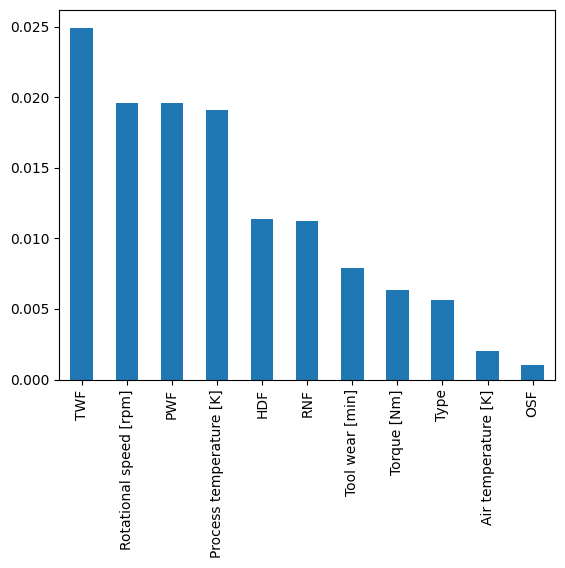

In [21]:
mi.plot(kind='bar')

#### select only top 7 features

In [22]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=7)
sel.fit(x_pre, y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__TWF',
       'num__HDF', 'num__PWF', 'num__OSF', 'cat__Type'], dtype=object)

In [23]:
sel_cols[0].split('__')

['num', 'Rotational speed [rpm]']

In [24]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [25]:
imp_cols = []  
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [26]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'HDF', 'PWF', 'OSF', 'Type']

In [27]:
x_imp = x[imp_cols]
x_imp

,Rotational speed [rpm],Torque [Nm],TWF,HDF,PWF,OSF,Type
0,1596,36.1,0,0,0,0,L
1,1759,29.1,0,0,0,0,M
2,1805,26.5,0,0,0,0,L
3,1524,44.3,0,0,0,0,L
4,1641,35.4,0,0,0,0,M
...,...,...,...,...,...,...,...
136424,1530,37.5,0,0,0,0,M
136425,1447,49.1,0,0,0,0,H
136426,1524,38.5,0,0,0,0,L
136427,1447,46.3,0,0,0,0,L


In [28]:
cat_sel = list(x_imp.columns[x_imp.dtypes=='object'])
con_sel = list(x_imp.columns[x_imp.dtypes!='object'])

In [29]:
cat_sel

['Type']

In [30]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'HDF', 'PWF', 'OSF']

#### create a final preprocessing pipeline using onehotencoder

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [33]:
cat_pipe1 = Pipeline(steps=([('impute', SimpleImputer(strategy='most_frequent')),
                             ('OHE',OneHotEncoder(handle_unknown='ignore',sparse_output=False))]))

In [34]:
pre1 = ColumnTransformer([('num', num_pipe1, con_sel),
                          ('cat', cat_pipe1, cat_sel)]).set_output(transform='pandas')

In [35]:
x_sel_pre = pre1.fit_transform(x_imp)
x_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__TWF,num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.545416,-0.499711,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.720308,-1.323028,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
2,2.051873,-1.628831,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,0.026445,0.464745,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
4,0.869773,-0.582043,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0


#### Algo Evaluation (Select Best model , Skip KNN and SVM as the dataset is large)

#### apply train test split

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_sel_pre, y, test_size=0.3, random_state=42)

In [37]:
xtrain.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__TWF,num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
58494,-0.744803,0.958735,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
75360,-0.636684,0.229512,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
131485,-1.025912,0.241274,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
45948,-0.024010,0.488269,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
105004,3.752944,-2.487432,-0.03945,-0.072021,-0.049016,-0.063038,1.0,0.0,0.0


In [38]:
xtest.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__TWF,num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
123128,-1.097992,2.546560,-0.03945,-0.072021,-0.049016,15.863363,0.0,1.0,0.0
54705,0.163396,-0.511473,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
40016,-0.153753,-0.217431,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
75025,-0.132129,-0.217431,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
120421,0.134564,-0.217431,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0


In [39]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [40]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


#### Preprocessing Completed
now go for algorithm evaluation using a dictionary
1. KNN and SVM shoud be used for small datasets only where data is below 1000 rows
2. here data is above 1000 rows so skip knn, svc
3. here we opt for classification as distict values 0,1 in y data

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [42]:
dct = {
        'Logistic' : LogisticRegression(),
        'Decision Tree' : DecisionTreeClassifier(),
        'Random Forest' : RandomForestClassifier(),
        'Gradient Boosting' : GradientBoostingClassifier(), 
        
      }

In [43]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier())])

In [44]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting'])

#### Fit the model and evaluate the results
Evaluate model with f1 score

In [45]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [46]:
tr = []
ts = []
tr_cv = []

In [47]:
for name,model in dct.items():
    #fit the model
    model.fit(xtrain,ytrain)
    #predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    #calculate f1 score in training and testing
    f1_tr = f1_score(ytrain,ypred_tr)
    f1_ts = f1_score(ytest,ypred_ts)
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.8657
Train F1 Cross Validated : 0.9316
Test F1 : 0.8564


Model name : Decision Tree

Train F1 : 0.9428
Train F1 Cross Validated : 0.8912
Test F1 : 0.7934


Model name : Random Forest

Train F1 : 0.9423
Train F1 Cross Validated : 0.9180
Test F1 : 0.8377


Model name : Gradient Boosting

Train F1 : 0.8750
Train F1 Cross Validated : 0.9309
Test F1 : 0.8520




In [48]:
# results in dictionary format
results_dct = {
                'Model_name' : list(dct.keys()),
                'Train f1' : tr,
                'test f1' : ts,
                'Cv f1' : tr_cv
              }

In [49]:
results_dct

{'Model_name': ['Logistic',
  'Decision Tree',
  'Random Forest',
  'Gradient Boosting'],
 'Train f1': [0.8657493492004464,
  0.9427679500520291,
  0.9422744555824405,
  0.875],
 'test f1': [0.8563734290843807,
  0.7934156378600824,
  0.837696335078534,
  0.8520499108734403],
 'Cv f1': [0.9316444860555878,
  0.891151739388446,
  0.9179750950624944,
  0.9309093365730681]}

In [50]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train f1,test f1,Cv f1
0,Logistic,0.865749,0.856373,0.931644
1,Decision Tree,0.942768,0.793416,0.891152
2,Random Forest,0.942274,0.837696,0.917975
3,Gradient Boosting,0.875000,0.852050,0.930909


In [51]:
results_df = results_df.sort_values(by='test f1',ascending=False)
results_df

,Model_name,Train f1,test f1,Cv f1
0,Logistic,0.865749,0.856373,0.931644
3,Gradient Boosting,0.875000,0.852050,0.930909
2,Random Forest,0.942274,0.837696,0.917975
1,Decision Tree,0.942768,0.793416,0.891152


#### so we will be using Gradient boosting classification model as per the f1 score

### create the gradient boosting classification model

### Hyperparameter tuning with Randomised search cv

In [52]:
params = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
          'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9, 10]}

In [53]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [54]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 7,
 'max_depth': 3,
 'learning_rate': 0.01}

In [55]:
rscv.best_score_

0.9316444860555878

In [56]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=7,
                           n_estimators=200)

In [57]:
best_gbc.score(xtrain, ytrain)

0.9962094240837697

In [58]:
best_gbc.score(xtest, ytest)

0.9961152239243568

#### predict train and test results

In [59]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [60]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [61]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [62]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [63]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Check the confusion matrix

In [64]:
c = best_gbc.classes_
c

array([0, 1], dtype=int64)

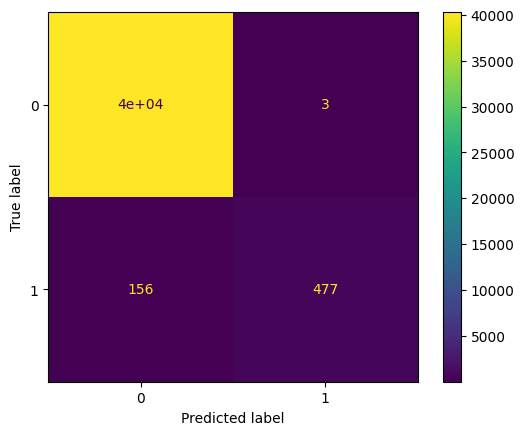

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

### Check classification report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.75      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



## Prediction on out of sample data

In [67]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [68]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Rotational speed [rpm]', 'Torque [Nm]',
                                  'TWF', 'HDF', 'PWF', 'OSF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

### apply pre.transform on out of sample data

In [69]:
xnew_pre = pre1.transform(xnew)
xnew_pre

,num__Rotational speed [rpm],num__Torque [Nm],num__TWF,num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,-0.153753,-0.276240,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.388744,-1.358313,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
2,0.033653,-0.311525,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,-0.297912,0.852880,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
4,-0.038426,0.111895,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
90949,-0.261872,0.006040,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
90950,0.156188,-0.770229,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
90951,-0.139337,0.123657,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
90952,0.098524,-0.005721,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0


### Predict the results

In [70]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
prob = best_gbc.predict_proba(xnew_pre)[:,0]
prob[0:5]

array([0.99366471, 0.99366471, 0.99366471, 0.99366471, 0.99366471])

### Save above results in dataframe

In [73]:
df_final = xnew[['Product ID']]
df_final

,Product ID
0,L50896
1,L53866
2,L50498
3,M21232
4,M19751
...,...
90949,L51130
90950,L47783
90951,L48097
90952,L48969


In [74]:
df_final['failure_pred'] = preds 
df_final['failure_prob'] = prob

In [75]:
df_final

,Product ID,failure_pred,failure_prob
0,L50896,0,0.993665
1,L53866,0,0.993665
2,L50498,0,0.993665
3,M21232,0,0.993665
4,M19751,0,0.993665
...,...,...,...
90949,L51130,0,0.993665
90950,L47783,0,0.993665
90951,L48097,0,0.993665
90952,L48969,0,0.993665


In [76]:
df_final['failure_pred'].value_counts()

failure_pred
0    89850
1     1104
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for machine failure'}, xlabel='failure_pred'>

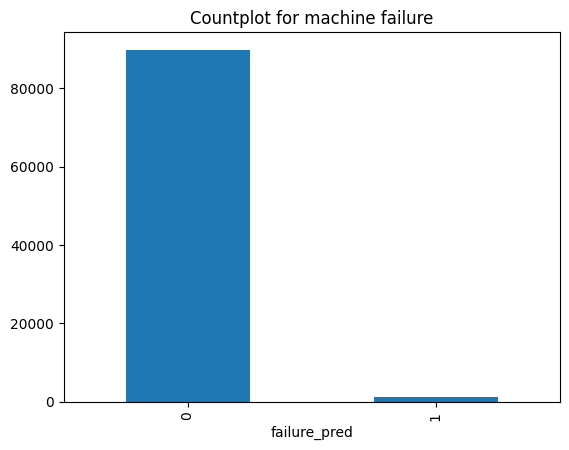

In [77]:
df_final['failure_pred'].value_counts().plot(kind='bar', title='Countplot for machine failure')

In [78]:
df_final.to_csv('Results.csv', index=False)